In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
import seaborn as sns


In [3]:
sc.settings.figdir="../result/10.30_lineage_draw/"
adata=sc.read("../../important_processed_data/10.27_dpt.h5ad")

In [153]:
sc.settings.figdir="../result/24.2.15_supp3/"
sc.settings._vector_friendly=True

In [4]:
sc._settings.settings._vector_friendly=True

In [5]:
dptbin=pd.read_csv("../../unimportant_processed_data/11.4_dpt_lineage_temp.csv")

In [8]:
dptbin2=pd.read_csv("../../important_processed_data/11.4_dpt_bin_df.csv")

In [9]:
dptbin2

,Unnamed: 0,dpt_bin,lineage,dpt_lineage
0,ChondroOsteo_Long_AAACCCAAGGAGAATG-1-1,6.0,chondro,chondro6.0
1,ChondroOsteo_Long_AAACCCACAAGTGTCT-1-1,5.0,chondro,chondro5.0
2,ChondroOsteo_Long_AAACCCACACGCTGTG-1-1,5.0,chondro,chondro5.0
3,ChondroOsteo_Long_AAACGAAAGGTGCTGA-1-1,6.0,chondro,chondro6.0
4,ChondroOsteo_Long_AAACGAAGTACCTATG-1-1,5.0,chondro,chondro5.0
...,...,...,...,...
181219,PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...,4.0,Mesenchyme,Mesenchyme4.0
181220,PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...,4.0,Mesenchyme,Mesenchyme4.0
181221,PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...,2.0,Mesenchyme,Mesenchyme2.0
181222,PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...,4.0,Mesenchyme,Mesenchyme4.0


In [29]:
adata.obs["dpt_bin"]=dptbin2["dpt_bin"]
adata.obs["dpt_lineage"]=dptbin2["dpt_lineage"]

/tmp/ipykernel_296010/1136005845.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["dpt_bin"]=dptbin2["dpt_bin"]

KeyboardInterrupt



In [28]:
adata=adata[dptbin2['Unnamed: 0']]

In [31]:
adata.obs["dpt_bin"]=dptbin2["dpt_bin"].values

/tmp/ipykernel_296010/2962522537.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["dpt_bin"]=dptbin2["dpt_bin"].values
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [42]:
adata.obs["dpt_lineage"]=dptbin2["dpt_lineage"].values

In [57]:
dptbin2['Unnamed: 0']

0                    ChondroOsteo_Long_AAACCCAAGGAGAATG-1-1
1                    ChondroOsteo_Long_AAACCCACAAGTGTCT-1-1
2                    ChondroOsteo_Long_AAACCCACACGCTGTG-1-1
3                    ChondroOsteo_Long_AAACGAAAGGTGCTGA-1-1
4                    ChondroOsteo_Long_AAACGAAGTACCTATG-1-1
                                ...                        
181219    PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...
181220    PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...
181221    PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...
181222    PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...
181223    PerichondrialP21_Matsushita_Prrx1creE11.5_TTTG...
Name: Unnamed: 0, Length: 181224, dtype: object

In [33]:
adata.obs["dpt_bin"]=adata.obs["dpt_bin"].astype("str")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


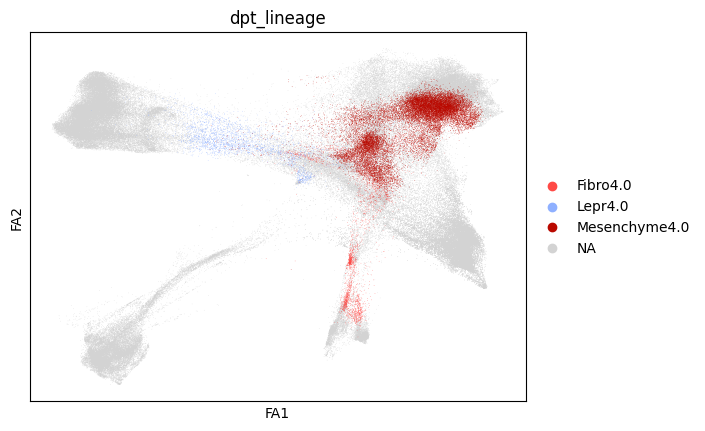

In [44]:
sc.pl.draw_graph(adata,color="dpt_lineage",groups=['Fibro4.0',"Lepr4.0","Mesenchyme4.0"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


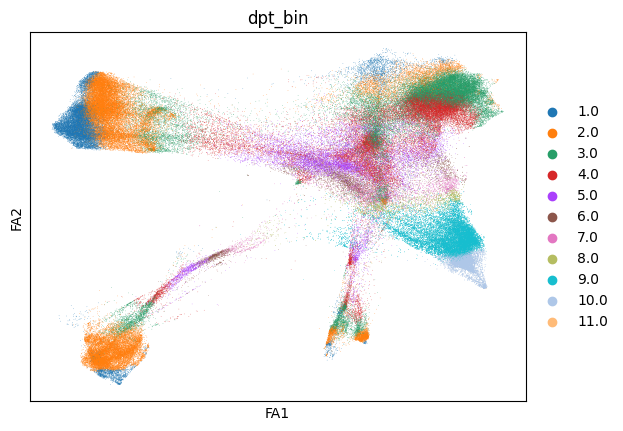

In [47]:
sc.pl.draw_graph(adata,color="dpt_bin")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


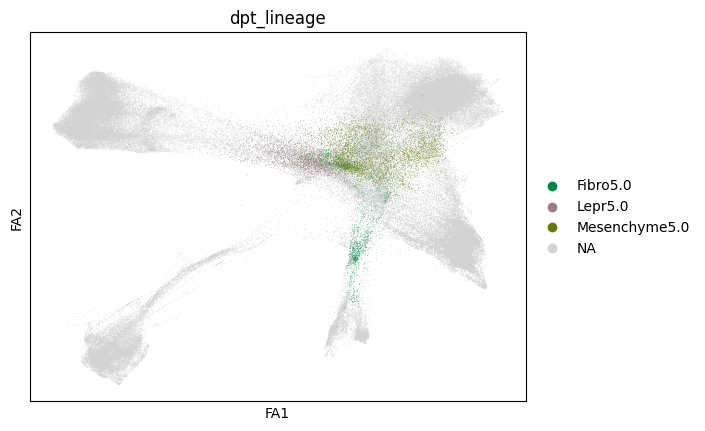

In [45]:
sc.pl.draw_graph(adata,color="dpt_lineage",groups=['Fibro5.0',"Lepr5.0","Mesenchyme5.0"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


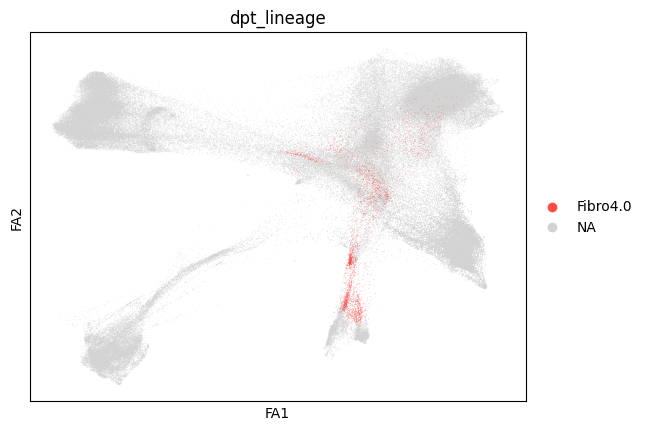

In [50]:
sc.pl.draw_graph(adata,color="dpt_lineage",groups=["Fibro4.0"])

In [40]:
sc.pl.draw_graph(adata,color="dpt_bin")

AnnData object with n_obs × n_vars = 181224 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [5]:
dpt2=pd.read_csv("../../important_processed_data/11.19_lightGBM_pred_and_orig.csv")

In [7]:
adata2=adata[dpt2['Unnamed: 0']]

In [8]:
adata2.obs["pred_dpt"]=dpt2["light_pred"].values

/tmp/ipykernel_395502/2400320716.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs["pred_dpt"]=dpt2["light_pred"].values


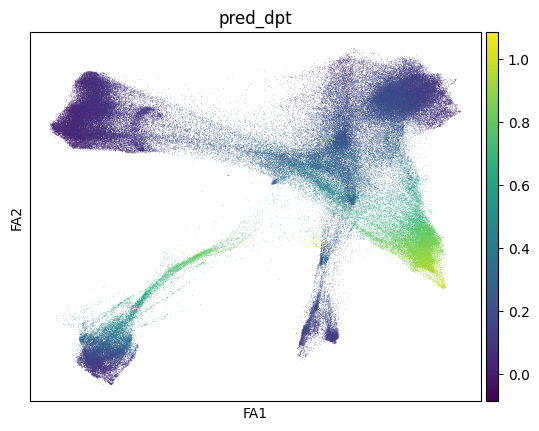

In [10]:
sc.pl.draw_graph(adata2,color="pred_dpt")

In [133]:
dpt=adata2.obs["pred_dpt"]
num_bins = 24
hist, bin_edges = np.histogram(dpt, bins=num_bins)
dpt_bin=np.digitize(dpt, bin_edges)
adata2.obs["dpt_bin2"]=dpt_bin-1
adata2.obs["dpt_bin2"]=adata2.obs["dpt_bin2"].astype(str)

In [134]:
adata2.obs["dpt_bin3"]=adata2.obs["dpt_bin2"]

In [135]:
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["3"])]

Unnamed: 0
Suture2021_Farmer_E15_AGACGTTCAGGTCTCG-1_2-0    3
Suture2021_Farmer_E15_ATAAGAGTCTAGCACA-1_2-0    3
Suture2021_Farmer_E15_CAAGAAAGTCGGCATC-1_2-0    3
Suture2021_Farmer_E15_CACATAGGTAAATGAC-1_2-0    3
Suture2021_Farmer_E15_CACCAGGAGAAGGGTA-1_2-0    3
                                               ..
TTCGGTCAGTATGAAC-1_5-1-2                        3
TTGCTGCTCCAGTTCC-1_5-1-2                        3
TTGGGTAGTAGTGTGG-1_5-1-2                        3
TTGTTTGTCCACAGCG-1_5-1-2                        3
TTTCCTCGTTGTGGCC-1_5-1-2                        3
Name: dpt_bin3, Length: 25015, dtype: object

In [152]:
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["0","1","2"])]="1"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["3","4"])]="2"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["5"])]="3"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["6","7"])]="4"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["8","9"])]="5"

adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["10","11"])]="6"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["12","13","14"])]="7"

adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["15","16","17"])]="8"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["18","19"])]="9"
adata2.obs["dpt_bin3"][adata2.obs["dpt_bin2"].isin(["20","21","22","23","24"])]="10"


In [137]:
adata2.obs["dpt_bin3"]=adata2.obs["dpt_bin3"].astype("str")

In [139]:
adata2.obs["dpt_bin4"]=adata2.obs["dpt_bin3"]

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


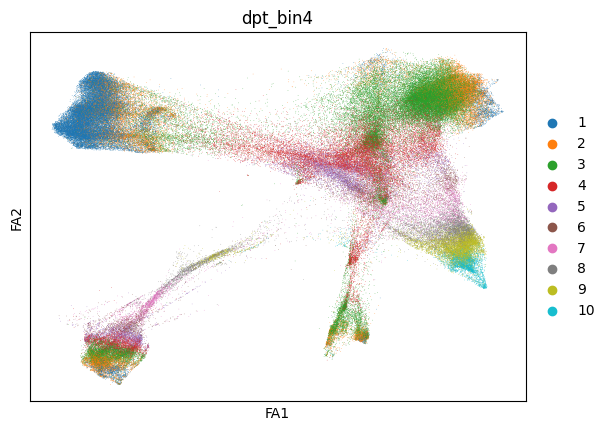

In [177]:
sc.pl.draw_graph(adata2,color="dpt_bin4",save="dpt_bin.pdf")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


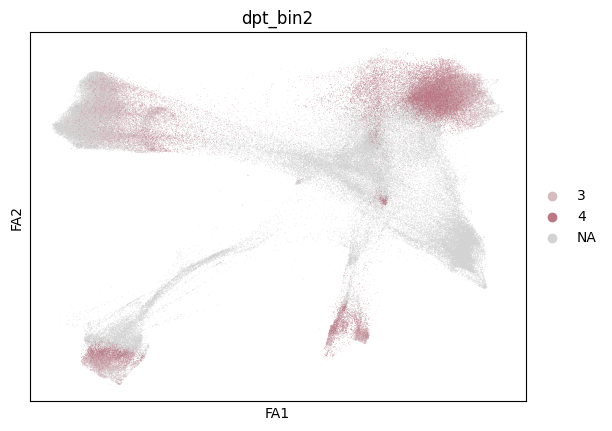

In [150]:
sc.pl.draw_graph(adata2,color="dpt_bin2",groups=["3","4"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


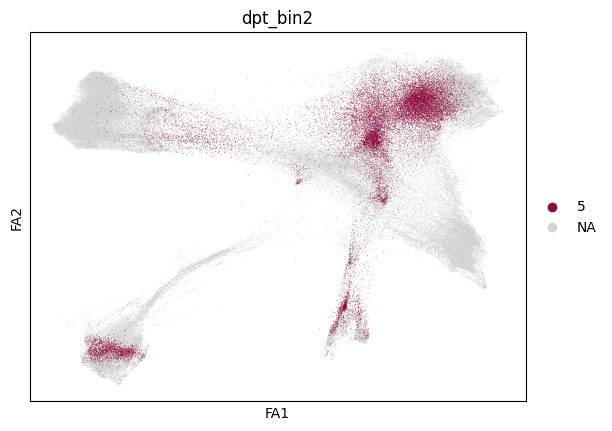

In [151]:
sc.pl.draw_graph(adata2,color="dpt_bin2",groups=["5"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


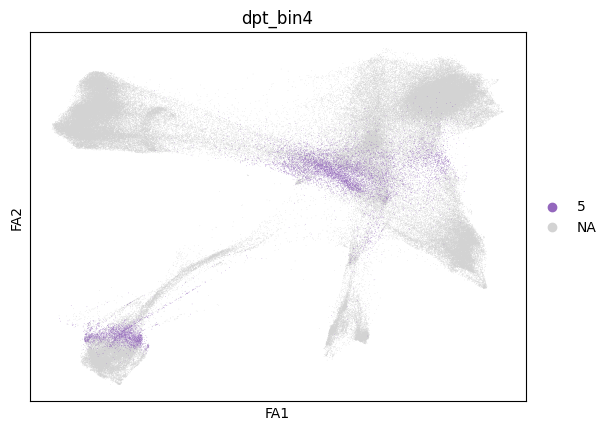

In [146]:
sc.pl.draw_graph(adata2,color="dpt_bin4",groups=["5"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


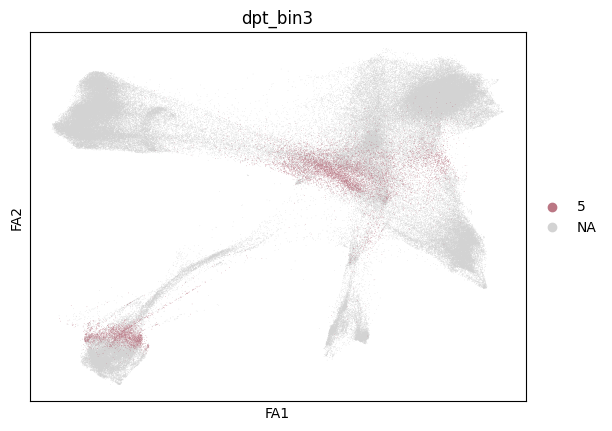

In [130]:
sc.pl.draw_graph(adata2,color="dpt_bin3",groups=["5"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


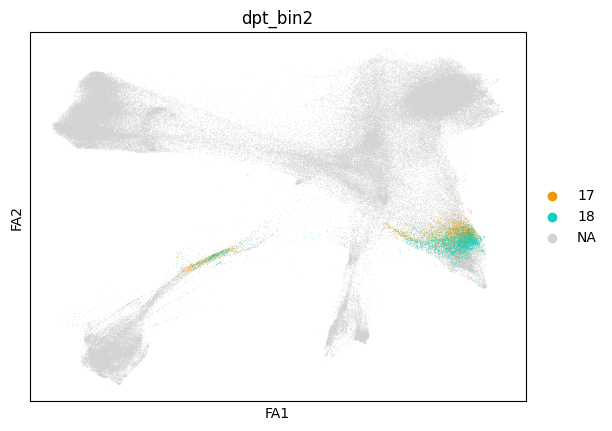

In [114]:
sc.pl.draw_graph(adata2,color="dpt_bin2",groups=["17","18"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


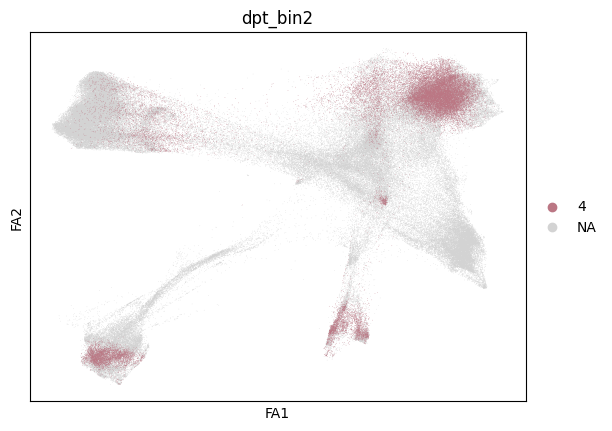

In [115]:
sc.pl.draw_graph(adata2,color="dpt_bin2",groups=["4"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


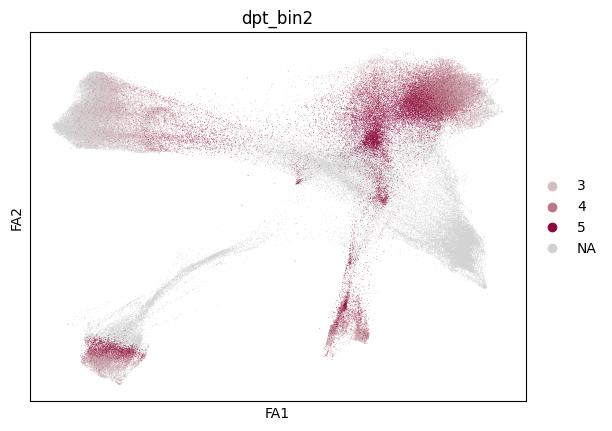

In [116]:
sc.pl.draw_graph(adata2,color="dpt_bin2",groups=["3","4","5"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


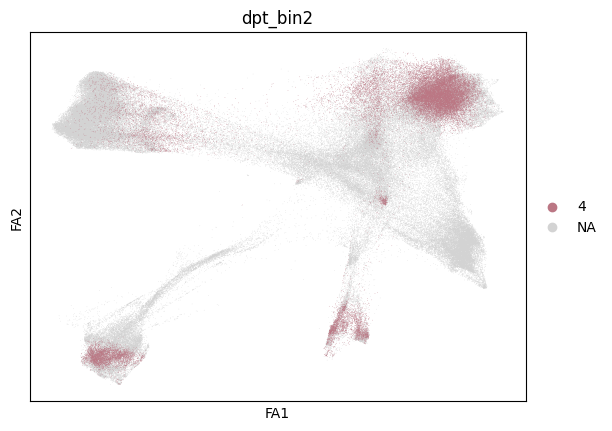

In [117]:
sc.pl.draw_graph(adata2,color="dpt_bin2",groups=["4"])

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


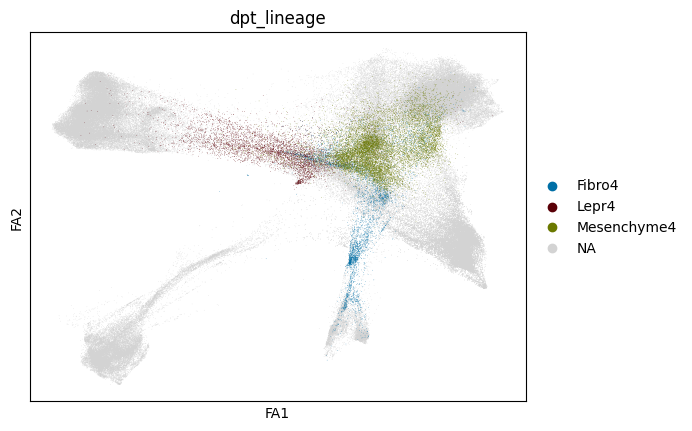

In [154]:
sc.pl.draw_graph(newAdata,color=["dpt_lineage"],groups=["Lepr4","Mesenchyme4","Fibro4"],save="pseudo4.0")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


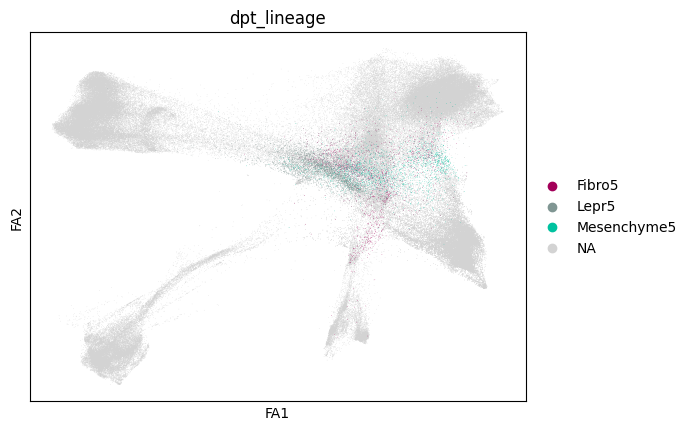

In [155]:
sc.pl.draw_graph(newAdata,color=["dpt_lineage"],groups=["Lepr5","Mesenchyme5","Fibro5"],save="pseudo5.0.pdf")

In [156]:
lineage=pd.read_csv("../../important_processed_data/11.2_dpt_lineage_infer.csv",index_col=0)
dpt_lineage_bin=lineage*np.array(adata2.obs["dpt_bin3"]).reshape(-1,1)
np.tile(dpt_lineage_bin.index, 4)
dpt_lineage_bin = dpt_lineage_bin.replace(0, np.nan)
dpt_lineage_long= pd.concat([dpt_lineage_bin["lineage_chondro"], dpt_lineage_bin["lineage_laFibro"],
                             dpt_lineage_bin["lineage_lepr"],dpt_lineage_bin["lineage_mesenchyme"]], ignore_index=True)
lineage=np.repeat(["chondro","Fibro","Lepr","Mesenchyme"], 166204)
dict={'dpt_bin': dpt_lineage_long, 'lineage': lineage}
dpt_lineage_df=pd.DataFrame(data=dict)
dpt_lineage_df.index=np.tile(dpt_lineage_bin.index, 4)


In [157]:
dpt_lineage_df=dpt_lineage_df[np.array(dpt_lineage_long!='')]
dpt_lineage_df["dpt_lineage"]=dpt_lineage_df['lineage']+dpt_lineage_df['dpt_bin'].astype(str)  
newAdata=adata2[dpt_lineage_df.index,:]

In [158]:
newAdata.obs["dpt_lineage"]=dpt_lineage_df["dpt_lineage"]
newAdata.obs["dpt_lineage"]=newAdata.obs["dpt_lineage"].astype("category")

/tmp/ipykernel_395502/4162424088.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  newAdata.obs["dpt_lineage"]=dpt_lineage_df["dpt_lineage"]
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [159]:
def downsample_and_predict(reflatent_seurat,label ,scANVI, subsample_size):
    cell_ranks = reflatent_seurat.obs[label].cat.categories
    downsampled_cells = []

    for cell_rank in cell_ranks:
        current_cells = np.where(reflatent_seurat.obs[label] == cell_rank)[0]
        if min(len(current_cells), subsample_size) < subsample_size:
            print(f"The current ident {cell_rank} is smaller than the sample size, adjust to the ident size")

        downsampled_cells.extend(np.random.choice(current_cells, size=min(len(current_cells), subsample_size), replace=False))

    downsample_seurat = reflatent_seurat[downsampled_cells,: ]

    # Prepare data for RandomForest
    if scANVI =="X":
        X=downsample_seurat.X
    else:
        X = downsample_seurat.obsm[scANVI]
    y = LabelEncoder().fit_transform(downsample_seurat.obs[label])

    # Train a RandomForest classifier
    rf_model = RandomForestClassifier(n_jobs=-1)
    rf_model.fit(X, y)

    # Get the class probabilities
    class_probs = rf_model.predict_proba(X)
    class_labels = rf_model.classes_

    # Create a DataFrame from the class probabilities
    votes = pd.DataFrame(data=class_probs, columns=class_labels)
    votes['ident'] = downsample_seurat.obs[label].values

    # Calculate class probabilities per cluster
    summary = votes.groupby('ident').mean()

    # Normalize the summary matrix
    summary = summary.divide(summary.max(axis=1), axis=0).fillna(0)
    np.fill_diagonal(summary.values, 0)
    summary.columns=summary.index.values


    return summary

In [160]:
predictDF2=downsample_and_predict(newAdata,"dpt_lineage" ,"X_scANVI",subsample_size=1000)

The current ident Fibro1 is smaller than the sample size, adjust to the ident size
The current ident Fibro6 is smaller than the sample size, adjust to the ident size
The current ident Mesenchyme10 is smaller than the sample size, adjust to the ident size
The current ident Mesenchyme6 is smaller than the sample size, adjust to the ident size
The current ident chondro10 is smaller than the sample size, adjust to the ident size
The current ident chondro9 is smaller than the sample size, adjust to the ident size


In [161]:

lepr_column=list(reversed(['Lepr1', 'Lepr2', 'Lepr3', 'Lepr4', 'Lepr5',
                  'Lepr6', 'Lepr7', 'Lepr8', 'Lepr9','Lepr10']))
mes_column=list(reversed([ 'Mesenchyme1','Mesenchyme2', 'Mesenchyme3', 'Mesenchyme4', 'Mesenchyme5',
                  'Mesenchyme6', 'Mesenchyme7', 'Mesenchyme8',
                  'Mesenchyme9','Mesenchyme10']))
chondro_column=list(reversed([ 'chondro1',  'chondro2',
                  'chondro3', 'chondro4', 'chondro5', 'chondro6',
                  'chondro7', 'chondro8', 'chondro9','chondro10']))
fibro_column=list(reversed(['Fibro1', 'Fibro2', 'Fibro3', 'Fibro4', 'Fibro5',
                  'Fibro6', 'Fibro7', 'Fibro8', 'Fibro9','Fibro10']))

In [162]:
predictDF2

,Fibro1,Fibro10,Fibro2,Fibro3,Fibro4,Fibro5,Fibro6,Fibro7,Fibro8,Fibro9,...,chondro1,chondro10,chondro2,chondro3,chondro4,chondro5,chondro6,chondro7,chondro8,chondro9
ident,,,,,,,,,,,,,,,,,,,,,
Fibro1,0.000000,0.000011,0.176923,0.026824,0.004241,0.001216,0.000707,0.000435,0.000293,0.000096,...,0.000033,0.000033,0.000000,0.000066,0.000164,0.000197,0.000296,0.000394,0.000307,0.000181
Fibro10,0.000000,0.000000,0.000093,0.000046,0.000062,0.000077,0.000163,0.000717,0.005440,0.038866,...,0.000015,0.039587,0.000031,0.000015,0.000046,0.000077,0.000139,0.000230,0.000826,0.003103
Fibro2,0.065205,0.000047,0.000000,0.094281,0.019892,0.005047,0.001137,0.000540,0.000289,0.000188,...,0.000097,0.000079,0.000255,0.000328,0.000255,0.000237,0.000359,0.000340,0.000319,0.000091
Fibro3,0.012455,0.000101,0.098799,0.000000,0.084617,0.018910,0.003117,0.001336,0.000406,0.000063,...,0.000168,0.000077,0.000193,0.000580,0.000297,0.000535,0.000683,0.000658,0.000451,0.000272
Fibro4,0.001673,0.000102,0.020088,0.085950,0.000000,0.072800,0.008544,0.002271,0.000607,0.000179,...,0.000093,0.000053,0.000106,0.000332,0.000438,0.000768,0.000648,0.000747,0.000471,0.000285
Fibro5,0.000618,0.000055,0.005134,0.018710,0.076435,0.000000,0.033117,0.010192,0.002505,0.000551,...,0.000055,0.000092,0.000151,0.000247,0.000494,0.002216,0.001442,0.001391,0.000952,0.000622
Fibro6,0.000449,0.000352,0.001797,0.004218,0.012091,0.048459,0.000000,0.051067,0.011805,0.001621,...,0.000061,0.000257,0.000020,0.000266,0.000490,0.000810,0.009277,0.002383,0.001938,0.001263
Fibro7,0.000258,0.001013,0.000775,0.001593,0.002195,0.011138,0.040270,0.000000,0.036687,0.005965,...,0.000000,0.001149,0.000052,0.000258,0.000362,0.000689,0.001291,0.016482,0.002561,0.002183
Fibro8,0.000125,0.005250,0.000204,0.000334,0.000596,0.002619,0.009889,0.035955,0.000000,0.040068,...,0.000016,0.001155,0.000031,0.000031,0.000314,0.000345,0.000765,0.001373,0.013293,0.002147


In [163]:

diagonal_mes_lepr = np.diag(predictDF2.loc[mes_column,lepr_column])
diagonal_mes_chondro = np.diag(predictDF2.loc[mes_column,chondro_column])
diagonal_mes_fibro = np.diag(predictDF2.loc[mes_column,fibro_column])
diagonal_mes_df = pd.DataFrame({
    'Fibro': diagonal_mes_fibro,
    'Lepr': diagonal_mes_lepr,
    'Chondro': diagonal_mes_chondro
})


In [170]:
diagonal_mes_df.index=reversed([1,2,3,4,5,6,7,8,9,10])

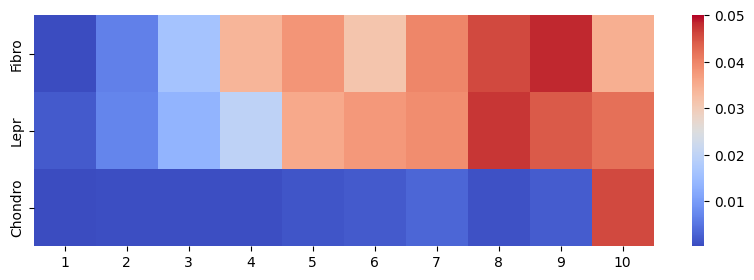

In [174]:
fig, ax = plt.subplots(figsize=(10, 3)) 
sns.heatmap(diagonal_mes_df.T.iloc[:, ::-1], annot=False, cmap='coolwarm',vmax=0.05)
plt.savefig("../result/24.2.15_supp3/mes_diag.pdf")

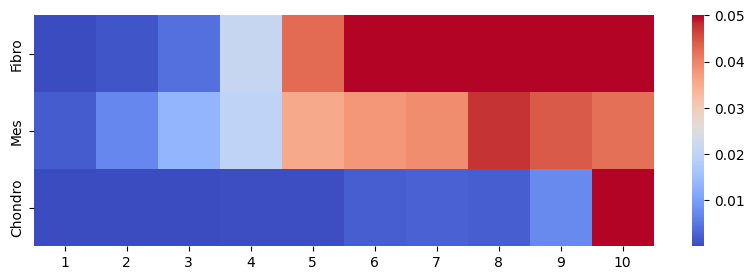

In [175]:
diagonal_mes_lepr = np.diag(predictDF2.loc[mes_column,lepr_column])
diagonal_lepr_chondro = np.diag(predictDF2.loc[lepr_column,chondro_column])
diagonal_lepr_fibro = np.diag(predictDF2.loc[lepr_column,fibro_column])
diagonal_lepr_df = pd.DataFrame({
    'Fibro': diagonal_lepr_fibro,
    'Mes': diagonal_mes_lepr,
    'Chondro': diagonal_lepr_chondro
})
diagonal_lepr_df.index=reversed([1,2,3,4,5,6,7,8,9,10])
fig, ax = plt.subplots(figsize=(10, 3)) 
sns.heatmap(diagonal_lepr_df.T.iloc[:, ::-1], annot=False, cmap='coolwarm',vmax=0.05)
plt.savefig("../result/24.2.15_supp3/lepr_diag.pdf")

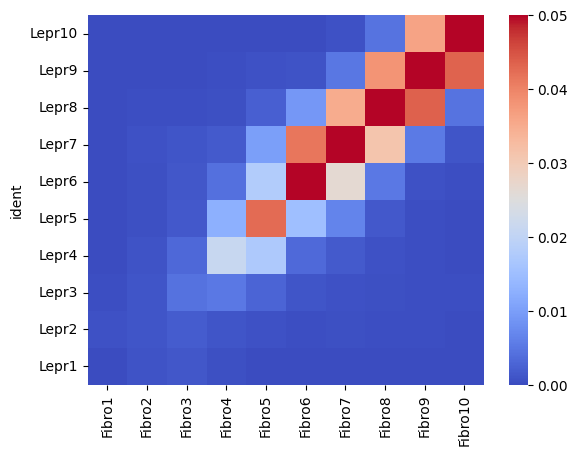

In [188]:
sns.heatmap(predictDF2.loc[lepr_column,reversed(fibro_column)], annot=False, cmap='coolwarm',vmax=0.05)
plt.savefig("../result/24.2.15_supp3/lepr_fibro.pdf")

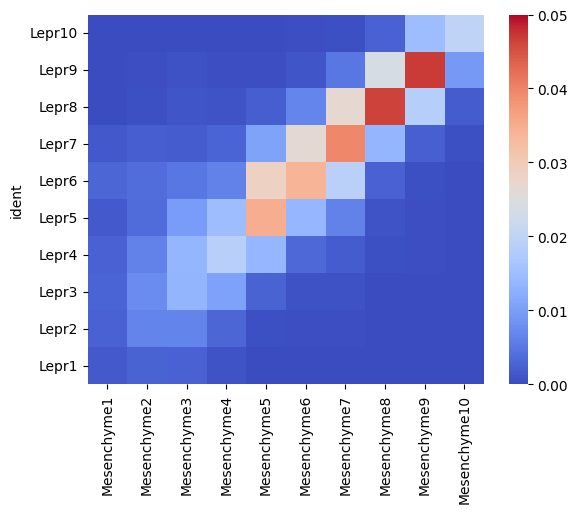

In [187]:
sns.heatmap(predictDF2.loc[lepr_column,reversed(mes_column)], annot=False, cmap='coolwarm',vmax=0.05)
plt.savefig("../result/24.2.15_supp3/lepr_mes.pdf")

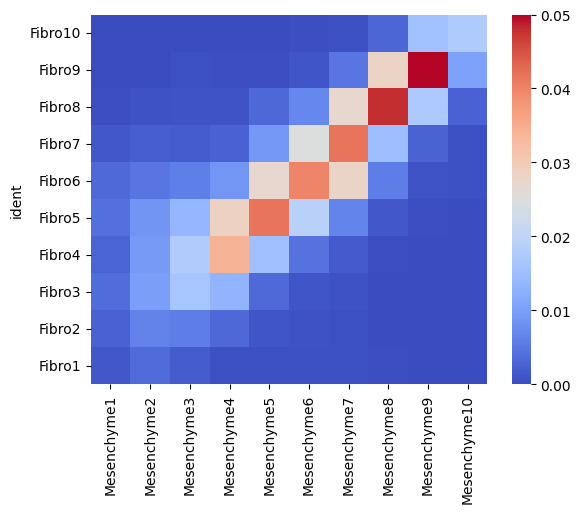

In [186]:
sns.heatmap(predictDF2.loc[fibro_column,reversed(mes_column)], annot=False, cmap='coolwarm',vmax=0.05)
plt.savefig("../result/24.2.15_supp3/fibro_mes.pdf")

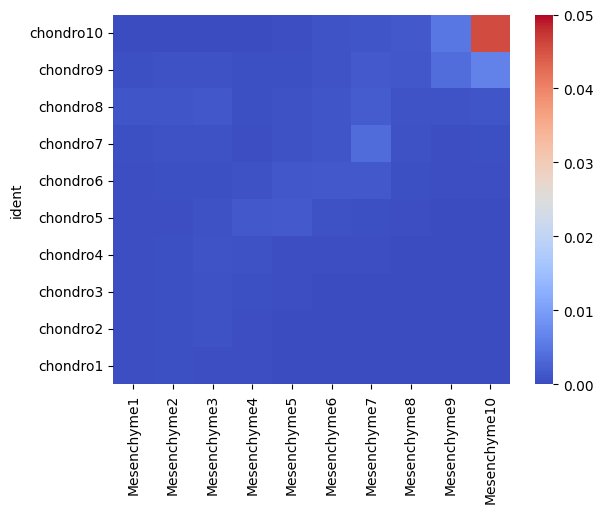

In [189]:
sns.heatmap(predictDF2.loc[chondro_column,reversed(mes_column)], annot=False, cmap='coolwarm',vmax=0.05)
plt.savefig("../result/24.2.15_supp3/chondro_mes.pdf")